<a href="https://colab.research.google.com/github/PattarapornH/cats-dogs-classifier/blob/master/cats_dogs_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.utils import np_utils
from google.colab import drive

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
!ls 'gdrive/My Drive/Colab Notebooks/cats_dogs/'

cats_dogs_classifier.ipynb  test_set  training_set


In [0]:
!pip install -U -q PyDrive

In [0]:
# collect training data path
path_train = 'gdrive/My Drive/Colab Notebooks/cats_dogs/training_set/'
path_cats_train = []
path_dogs_train = []
for path in os.listdir(path_train + 'cats'):
  path_cats_train.append(os.path.join(path_train+'cats', path))
for path in os.listdir(path_train + 'dogs'):
  path_dogs_train.append(os.path.join(path_train+'dogs', path))

In [9]:
len(path_cats_train),len(path_dogs_train)

(4000, 4005)

In [43]:
# load training data
X_train = []
j = 0
k = 0
for i in range(6000):
  if(i%50 == 0):
    print('.', end='')
  if(i%3000 == 0 and i != 0):
    print('\n')
# i%2 == 0 ? cat:dog
  try:
    if(i%2 == 0 and j < len(path_cats_train)):
      path = path_cats_train[j]
      img = load_img(path, target_size=(150, 150))
      X_train.append(img_to_array(img))
      j+=1
    if(i%2 == 1 and k < len(path_dogs_train)):
      path = path_dogs_train[k]
      img = load_img(path, target_size=(150, 150))
      X_train.append(img_to_array(img))
      k+=1
  except Exception as e:
    print(e)
    print(i)
    print(j)
    print(k)
    break
print("\nLoad training data complete")

.............................................................

...........................................................
Load training data complete


In [0]:
nb_train_samples = len(X_train)

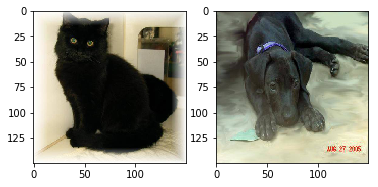

In [45]:
plt.subplot(121)
plt.imshow(X_train[0]/255)
plt.subplot(122)
plt.imshow(X_train[1]/255)

In [46]:
X_train = np.array(X_train)
X_train.shape

(6000, 150, 150, 3)

In [0]:
# collect test data path
path_test = 'gdrive/My Drive/Colab Notebooks/cats_dogs/test_set/'
path_cats_test = []
path_dogs_test = []
for path in os.listdir(path_test + 'cats'):
  path_cats_test.append(os.path.join(path_test+'cats', path))
for path in os.listdir(path_test + 'dogs'):
  path_dogs_test.append(os.path.join(path_test+'dogs', path))

In [48]:
len(path_cats_test),len(path_dogs_test)

(1011, 1012)

In [49]:
# load test data
X_test = []
j = 0
k = 0
for i in range(2000):
  if(i%20 == 0):
    print('.', end='')
  if(i == 1000):
    print('\n')
  try:
    if(i%2 == 0 and j < len(path_cats_test)):
      path = path_cats_test[j]
      img = load_img(path, target_size=(150, 150))
      X_test.append(img_to_array(img))
      j+=1
    if(i%2 == 1 and k < len(path_dogs_test)):
      path = path_dogs_test[k]
      img = load_img(path, target_size=(150, 150))
      X_test.append(img_to_array(img))
      k+=1
  except Exception as e:
    print(e)
    print(i)
    break
print('\nload test data complete')

...................................................

.................................................
load test data complete


In [50]:
X_test = np.array(X_test)
X_test.shape

(2000, 150, 150, 3)

In [55]:
# init y --> 0 = cat, 1 = dog
y_train = []
y_test = []
for i in range(6000):
  if(i < 2000):
    y_train.append(i%2)
    y_test.append(i%2)
  else :
    y_train.append(i%2)
    
y_train = np.array(y_train)
y_test = np.array(y_test)
print('Init label data complete')

Init label data complete


In [0]:
# preprocessing
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(
    X_train,
    y_train,
    batch_size=32)

test_generator = test_datagen.flow(
    X_test,
    y_test,
    batch_size=32)

In [143]:
# Init CNN
model = Sequential()

# Convolution
model.add(Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))

# Pooling
model.add(MaxPooling2D((2, 2)))

# Second layer of convolution
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Third layer of convolution
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flattening
model.add(Flatten())

# Dropout
model.add(Dropout(0.5))

# Full Connection
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 36992)             0         
__________

In [145]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop',metrics=['accuracy'])

train_model = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs= 200,
    validation_data=test_generator,
    validation_steps=50)

Epoch 1/200
100/100 [==============================] - 17s 170ms/step - loss: 0.6795 - acc: 0.6162 - val_loss: 0.6106 - val_acc: 0.7014
Epoch 2/200
100/100 [==============================] - 16s 162ms/step - loss: 0.6368 - acc: 0.6488 - val_loss: 0.5820 - val_acc: 0.7090
Epoch 3/200
100/100 [==============================] - 15s 150ms/step - loss: 0.6397 - acc: 0.6253 - val_loss: 0.5745 - val_acc: 0.6737
Epoch 4/200
100/100 [==============================] - 15s 149ms/step - loss: 0.6129 - acc: 0.6709 - val_loss: 0.6031 - val_acc: 0.6812
Epoch 5/200
100/100 [==============================] - 15s 150ms/step - loss: 0.6157 - acc: 0.6672 - val_loss: 0.5967 - val_acc: 0.7090
Epoch 6/200
100/100 [==============================] - 16s 162ms/step - loss: 0.6169 - acc: 0.6763 - val_loss: 0.5565 - val_acc: 0.7342
Epoch 7/200
100/100 [==============================] - 15s 150ms/step - loss: 0.6050 - acc: 0.6728 - val_loss: 0.5443 - val_acc: 0.7137
Epoch 8/200
100/100 [===========================

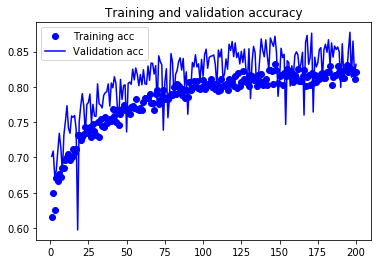

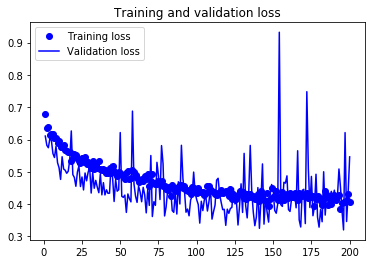

In [146]:
acc = train_model.history['acc']
val_acc = train_model.history['val_acc']
loss = train_model.history['loss']
val_loss = train_model.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [0]:
predicted = model.predict_classes(X_test)

In [148]:
corrected = []
incorrected = []
for i in range(len(predicted)):
    if(predicted[i] == y_test[i]):
        corrected.append(int(i))
    else:
        incorrected.append(int(i))
corr = len(corrected)
incorr = len(incorrected)
print(corr,incorr)

1271 729


In [0]:
prob = model.predict_proba(X_test)

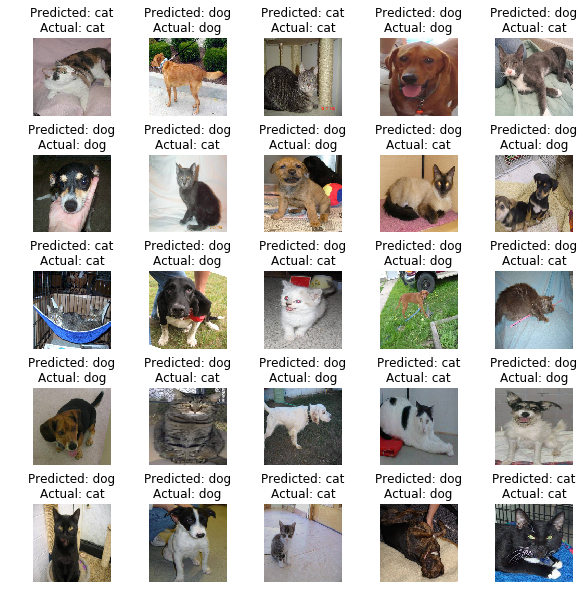

In [150]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.subplots_adjust(wspace = 0.2,hspace = 0.5)
    if(predicted[i] == 0):
        res = 'cat'
    else:
        res = 'dog'
        
    if(y_test[i] == 0):
        act = 'cat'
    else:
        act = 'dog'
    title = "Predicted: "+res+"\nActual: "+act
#     title = "Predicted: "+res+"\nProb: "+str(prob[i][0])
    plt.title(title)
    plt.axis('off')
    plt.imshow(X_test[i]/255)

In [0]:
test = []
img = load_img('gdrive/My Drive/Colab Notebooks/cats_dogs/meaw.PNG', target_size=(150, 150))
test.append(img_to_array(img))

In [0]:
test2 = [0]

In [158]:
# test = np.expand_dims(test, axis=0)
test = np.array(test)
test.shape

(1, 150, 150, 3)

In [0]:
p = model.predict(test)

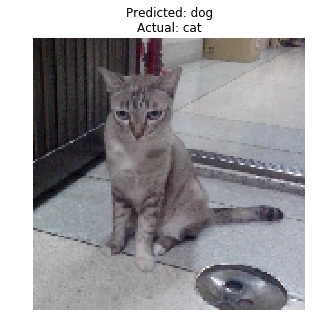

In [160]:
plt.figure(figsize=(5,5))
if(p[0] == 0):
    res = 'cat'
else:
    res = 'dog'

if(test2[0] == 0):
    act = 'cat'
else:
    act = 'dog'
title = "Predicted: "+res+"\nActual: "+act
# title = "Predicted: "+res+"\nProb: "+str(prob[i][0])
plt.title(title)
plt.axis('off')
plt.imshow(test[0]/255)